# Graded: x of 40 correct
- [10] Contains correct number of plots (1 pt each, 10 pts total)
- [10] Contains correct layout (1 pt each, 10 pts total)
- [10] Each plot contains correct data (1 pt each, 10 pts total)
- [10] Titles, labels, and axes (1 pt each, 10 pts total)

Comments: 


# Assignment 3: Constructing a visual report with Matplotlib
You are performing an analysis of fuel efficiency in personal vehicles from model years 1970 - 1980. You have extracted the following data in `list` form:
- `all_mpgs`: Fuel economy (miles per gallon) for all selected vehicle models across all years
- `all_weights`: Weights (lbs) for all selected vehicle models across all years
- `unique_model_years`: A list of model years from 1970 to 1980
- `yearly_mean_mpgs`: Average fuel economy (miles per gallon) for vehicles in each model year
- `yearly_mean_horsepower`: Average engine power (horsepower) for vehicles in each model year
- `origins_1970`: The origin for each vehicle from the 1970 model year
- `origins_1980`: The origin for each vehicle from the 1980 model year
- `origin_mean_mpgs`: Average fuel economy (miles per gallon) for vehicles from each origin
- `origin_mean_horsepower`: Average engine power (horsepower) for vehicles from each origin
- `origin_mean_cylinders`: Average number of engine cylinders for vehicles from each origin
- `origin_mean_displacement`: Average cylinder volume (cm^3) for vehicles from each origin
- `origin_mean_weight`: Average weight (lbs) for vehicles from each origin
- `origin_mean_acceleration`: Average acceleration (ft/s^2) for vehicles from each origin

Your task is to create a visual report for these data. You will create a single Matplotlib Figure containing the following subplots:
1. A scatter plot with `all_weights` on the x-axis and `all_mpgs` on the y-axis
2. A line plot with `unique_model_years` with **separate** y-axes for `yearly_mean_mpgs` and `yearly_mean_horsepower`. Include markers for each data point.
3. Two pie charts, one each for the number of models by origin in `origins_1970` and `origins_1980`
4. A series of 6 bar plots with `origin_mean_mpgs`, `origin_mean_horsepower`, `origin_mean_cylinders`, `origin_mean_displacement`, `origin_mean_weight`, and `origin_mean_acceleration` on y-axis, and each should have `unique_origins` on the x-axis.

The subplots should use a layout with 3 rows:
- Row 1, three subplots: Scatter plot (item 1 above), 2 pie charts (item 3)
- Row 2, 1 subplot stretched across the figure: Line plot (item 2)
- Row 3, 6 subplots: 6 bar plots (item 4)

Be sure to give each subplot a title and label the axes with appropriate descriptor and units. You may customize the appearance (colors, marker types, etc.) in any way you think looks appealing
<br />
<br />
The next cell loads the data and should not be changed.

In [50]:
# Do not change this cell
import pandas as pd
import seaborn as sns

data = sns.load_dataset('mpg')

all_mpgs = data['mpg'].to_list()
all_weights = data['weight'].to_list()

unique_model_years = list(data['model_year'].unique())
unique_origins = sorted(list(data['origin'].unique()))

yearly_mean_mpgs = data.groupby('model_year').mean(numeric_only=True)['mpg'].to_list()
yearly_mean_horsepower = data.groupby('model_year').mean(numeric_only=True)['horsepower'].to_list()

origins_1970 = data.loc[data['model_year'] == 70, 'origin']
origins_1980 = data.loc[data['model_year'] == 80, 'origin']

origin_mean_mpgs = data.groupby('origin').mean(numeric_only=True)['mpg'].to_list()
origin_mean_horsepower = data.groupby('origin').mean(numeric_only=True)['horsepower'].to_list()
origin_mean_cylinders = data.groupby('origin').mean(numeric_only=True)['cylinders'].to_list()
origin_mean_displacement = data.groupby('origin').mean(numeric_only=True)['displacement'].to_list()
origin_mean_weight = data.groupby('origin').mean(numeric_only=True)['weight'].to_list()
origin_mean_acceleration = data.groupby('origin').mean(numeric_only=True)['acceleration'].to_list()


In [51]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from collections import Counter

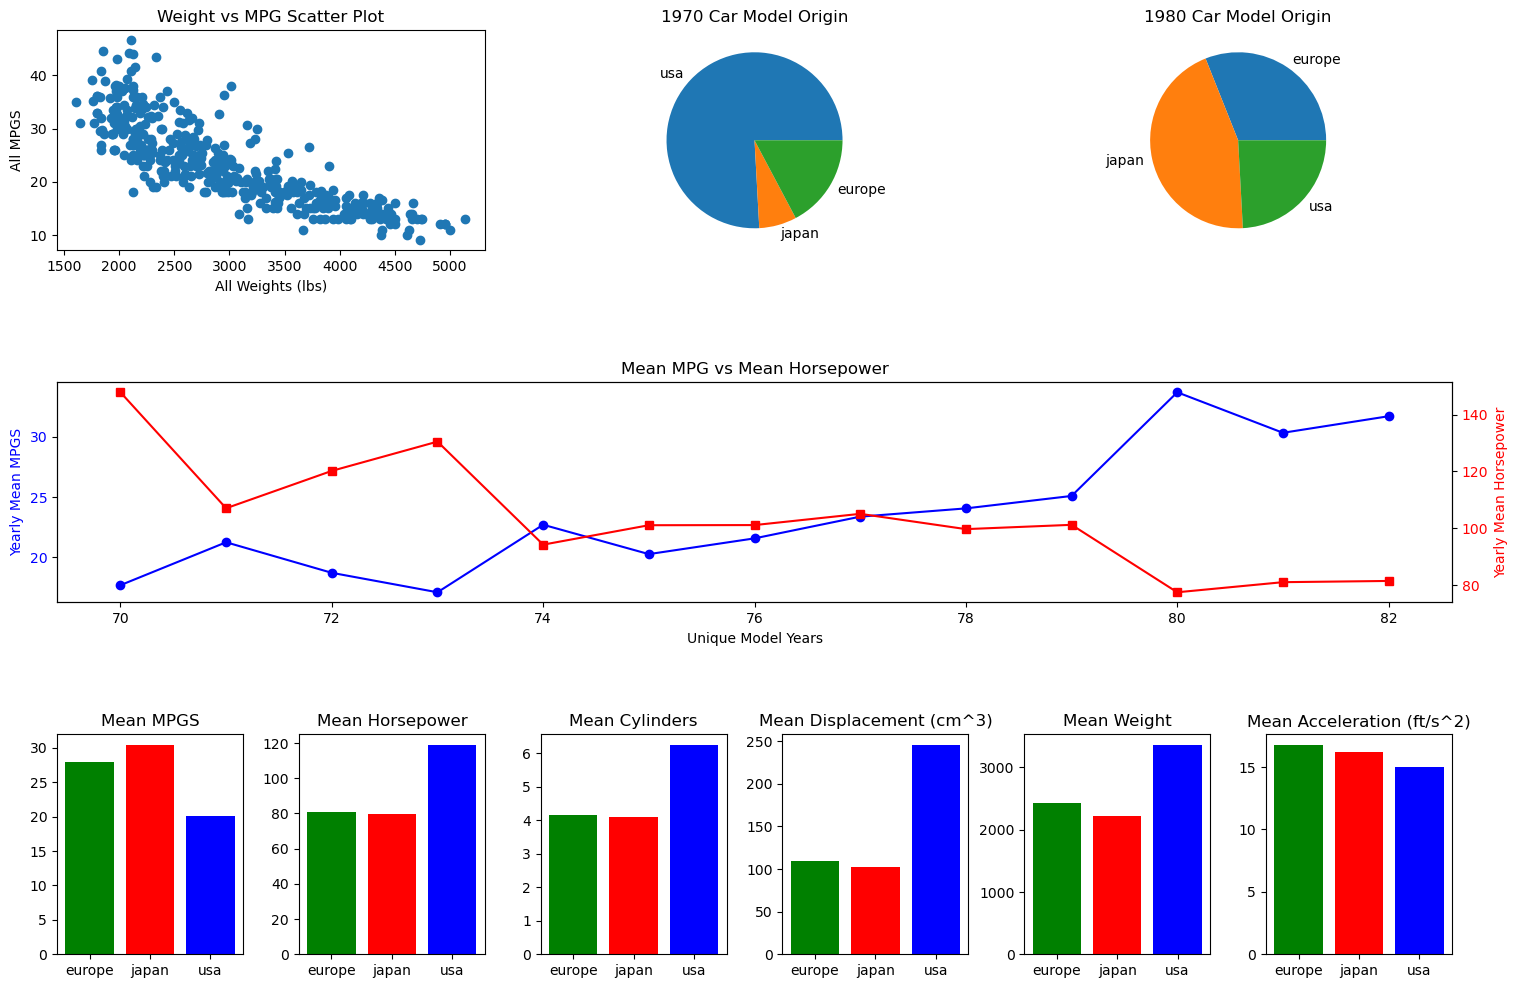

In [66]:
fig = plt.figure(figsize=(18,12))
gs = GridSpec(3,6,hspace=.6,wspace=.3)

#Scatter

ax1 = fig.add_subplot(gs[0, 0:2])
ax1.scatter(all_weights, all_mpgs)
ax1.set_xlabel('All Weights (lbs)')
ax1.set_ylabel('All MPGS')
ax1.set_title('Weight vs MPG Scatter Plot')

#pie

ax2 = fig.add_subplot(gs[0, 2:4])
origins_1970_counts = Counter(origins_1970)
labels_1970 = list(origins_1970_counts.keys())
size_1970 = list(origins_1970_counts.values())
ax2.pie(size_1970, labels = labels_1970)
ax2.set_title('1970 Car Model Origin')

ax3 = fig.add_subplot(gs[0, 4:6])
origins_1980_counts = Counter(origins_1980)
labels_1980 = list(origins_1980_counts.keys())
size_1980 = list(origins_1980_counts.values())
ax3.pie(size_1980, labels = labels_1980)
ax3.set_title('1980 Car Model Origin')


#Line

ax4 = fig.add_subplot(gs[1, :])
ax4.plot(unique_model_years, yearly_mean_mpgs, 'b-o')
ax4.set_xlabel('Unique Model Years')
ax4.set_ylabel('Yearly Mean MPGS', color='blue')
ax4.tick_params(axis='y', labelcolor='blue')
ax4.set_title('Mean MPG vs Mean Horsepower')

ax5 = ax4.twinx()
ax5.plot(unique_model_years, yearly_mean_horsepower, 'r-s')
ax5.set_ylabel('Yearly Mean Horsepower', color='red')
ax5.tick_params(axis='y', labelcolor='red')

#Bar

color_map = {'usa': 'blue', 'japan': 'red', 'eur': 'green', 'europe': 'green'}
colors = [color_map.get(origin.lower(), 'gray') for origin in unique_origins]

ax6 = fig.add_subplot(gs[2, 0])
ax6.bar(unique_origins, origin_mean_mpgs, color=colors)
ax6.set_title('Mean MPGS')

ax7 = fig.add_subplot(gs[2, 1])
ax7.bar(unique_origins, origin_mean_horsepower,color=colors)
ax7.set_title('Mean Horsepower')

ax8 = fig.add_subplot(gs[2, 2])
ax8.bar(unique_origins, origin_mean_cylinders,color=colors)
ax8.set_title('Mean Cylinders')

ax9 = fig.add_subplot(gs[2, 3])
ax9.bar(unique_origins, origin_mean_displacement,color=colors)
ax9.set_title('Mean Displacement (cm^3)')

ax10 = fig.add_subplot(gs[2, 4])
ax10.bar(unique_origins, origin_mean_weight,color=colors)
ax10.set_title('Mean Weight')

ax11 = fig.add_subplot(gs[2, 5])
ax11.bar(unique_origins, origin_mean_acceleration,color=colors)
ax11.set_title('Mean Acceleration (ft/s^2)')


plt.show()